In [126]:
import nltk
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [127]:
df = pd.read_csv('Company_reviews.csv')
df

,Unnamed: 0,Company Review,Author,Date,headline,reviewBody,ratingValue
0,0,Flipdish,Niko Vassilis,2025-01-16T11:33:52.000Z,Keep Away,Keep Away. Terrible company to deal with. No d...,1
1,1,Flipdish,Himanshu arora,2024-12-26T00:03:09.000Z,Good onboarding team Hassan really good…,Good onboarding team Hassan really good . Sale...,5
2,2,Flipdish,DDS,2024-12-19T22:43:19.000Z,"Orlando and Alishba,","Orlando and Alishba,Outstanding customer servi...",5
3,3,Flipdish,Mattia,2024-12-12T14:03:20.000Z,Loved working with Lucia,"Lucia, has been super helpful and has gone the...",5
4,4,Flipdish,ounis fathia,2024-12-16T20:27:54.000Z,Bad service 😩😩😒,The service very bad many time the driver come...,1
...,...,...,...,...,...,...,...
274,274,Flipdish,Mark Mc Gowan,2020-07-09T09:56:23.000Z,Excellent system,Excellent system. Customer friendly!,5
275,275,Flipdish,Mathias Dienst,2020-06-23T11:46:19.000Z,Great product and service!,Great product and service!,5
276,276,Flipdish,Jeyson Jones,2020-06-12T16:49:00.000Z,Great customer service from day 1,Great customer service from day 1! So easy to...,5
277,277,Flipdish,Mauro Pacitti,2020-03-28T02:25:25.000Z,Professional company and great team to…,Professional company and great team to deal wi...,5


In [128]:
df[['Dates','Time']] = df['Date'].str.split('T',expand=True)
df

,Unnamed: 0,Company Review,Author,Date,headline,reviewBody,ratingValue,Dates,Time
0,0,Flipdish,Niko Vassilis,2025-01-16T11:33:52.000Z,Keep Away,Keep Away. Terrible company to deal with. No d...,1,2025-01-16,11:33:52.000Z
1,1,Flipdish,Himanshu arora,2024-12-26T00:03:09.000Z,Good onboarding team Hassan really good…,Good onboarding team Hassan really good . Sale...,5,2024-12-26,00:03:09.000Z
2,2,Flipdish,DDS,2024-12-19T22:43:19.000Z,"Orlando and Alishba,","Orlando and Alishba,Outstanding customer servi...",5,2024-12-19,22:43:19.000Z
3,3,Flipdish,Mattia,2024-12-12T14:03:20.000Z,Loved working with Lucia,"Lucia, has been super helpful and has gone the...",5,2024-12-12,14:03:20.000Z
4,4,Flipdish,ounis fathia,2024-12-16T20:27:54.000Z,Bad service 😩😩😒,The service very bad many time the driver come...,1,2024-12-16,20:27:54.000Z
...,...,...,...,...,...,...,...,...,...
274,274,Flipdish,Mark Mc Gowan,2020-07-09T09:56:23.000Z,Excellent system,Excellent system. Customer friendly!,5,2020-07-09,09:56:23.000Z
275,275,Flipdish,Mathias Dienst,2020-06-23T11:46:19.000Z,Great product and service!,Great product and service!,5,2020-06-23,11:46:19.000Z
276,276,Flipdish,Jeyson Jones,2020-06-12T16:49:00.000Z,Great customer service from day 1,Great customer service from day 1! So easy to...,5,2020-06-12,16:49:00.000Z
277,277,Flipdish,Mauro Pacitti,2020-03-28T02:25:25.000Z,Professional company and great team to…,Professional company and great team to deal wi...,5,2020-03-28,02:25:25.000Z


In [129]:
df.drop(columns=['Date','Time'],inplace=True)
df

,Unnamed: 0,Company Review,Author,headline,reviewBody,ratingValue,Dates
0,0,Flipdish,Niko Vassilis,Keep Away,Keep Away. Terrible company to deal with. No d...,1,2025-01-16
1,1,Flipdish,Himanshu arora,Good onboarding team Hassan really good…,Good onboarding team Hassan really good . Sale...,5,2024-12-26
2,2,Flipdish,DDS,"Orlando and Alishba,","Orlando and Alishba,Outstanding customer servi...",5,2024-12-19
3,3,Flipdish,Mattia,Loved working with Lucia,"Lucia, has been super helpful and has gone the...",5,2024-12-12
4,4,Flipdish,ounis fathia,Bad service 😩😩😒,The service very bad many time the driver come...,1,2024-12-16
...,...,...,...,...,...,...,...
274,274,Flipdish,Mark Mc Gowan,Excellent system,Excellent system. Customer friendly!,5,2020-07-09
275,275,Flipdish,Mathias Dienst,Great product and service!,Great product and service!,5,2020-06-23
276,276,Flipdish,Jeyson Jones,Great customer service from day 1,Great customer service from day 1! So easy to...,5,2020-06-12
277,277,Flipdish,Mauro Pacitti,Professional company and great team to…,Professional company and great team to deal wi...,5,2020-03-28


In [ ]:
#Tokenize the text
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def process_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]','',text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['cleaned_text'] = df['reviewBody'].apply(process_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hydermac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/hydermac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [131]:
# get sentiment using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity >0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else: return 'Neutral'

df['Sentiment'] = df['cleaned_text'].apply(get_sentiment)
df

,Unnamed: 0,Company Review,Author,headline,reviewBody,ratingValue,Dates,cleaned_text,Sentiment
0,0,Flipdish,Niko Vassilis,Keep Away,Keep Away. Terrible company to deal with. No d...,1,2025-01-16,keep away terrible company deal different cowb...,Negative
1,1,Flipdish,Himanshu arora,Good onboarding team Hassan really good…,Good onboarding team Hassan really good . Sale...,5,2024-12-26,good onboarding team hassan really good sales ...,Positive
2,2,Flipdish,DDS,"Orlando and Alishba,","Orlando and Alishba,Outstanding customer servi...",5,2024-12-19,orlando alishbaoutstanding customer service so...,Neutral
3,3,Flipdish,Mattia,Loved working with Lucia,"Lucia, has been super helpful and has gone the...",5,2024-12-12,lucia super helpful gone extra mile anytime ne...,Positive
4,4,Flipdish,ounis fathia,Bad service 😩😩😒,The service very bad many time the driver come...,1,2024-12-16,service bad many time driver come late today o...,Negative
...,...,...,...,...,...,...,...,...,...
274,274,Flipdish,Mark Mc Gowan,Excellent system,Excellent system. Customer friendly!,5,2020-07-09,excellent system customer friendly,Positive
275,275,Flipdish,Mathias Dienst,Great product and service!,Great product and service!,5,2020-06-23,great product service,Positive
276,276,Flipdish,Jeyson Jones,Great customer service from day 1,Great customer service from day 1! So easy to...,5,2020-06-12,great customer service day easy reach ultra re...,Positive
277,277,Flipdish,Mauro Pacitti,Professional company and great team to…,Professional company and great team to deal wi...,5,2020-03-28,professional company great team deal years nev...,Positive


In [132]:
sentiment_counts


,Sentiment,count
0,Positive,239
1,Negative,23
2,Neutral,17


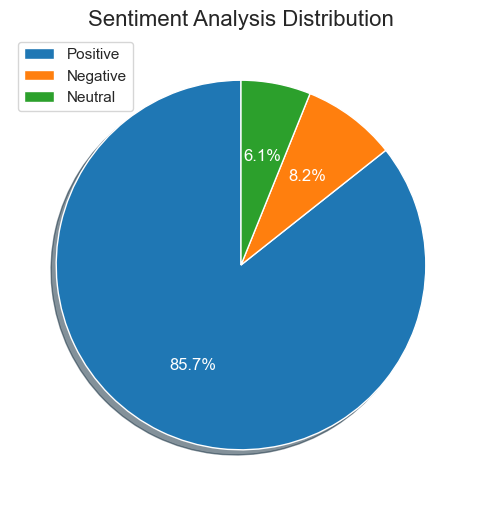

In [ ]:

sentiment_counts = df['Sentiment'].value_counts().reset_index()
plt.figure(figsize=(10,6))
plt.pie(sentiment_counts['count'],labels=sentiment_counts['Sentiment'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('tab10'), shadow=True, textprops={'color':'w'})
plt.legend(sentiment_counts['Sentiment'])
plt.title('Sentiment Analysis Distribution',fontsize=16)
plt.show()


In [134]:
#get most Common Positive and Negative Words
analyzer = SentimentIntensityAnalyzer()
positive_words = []
negative_words = []
for text in df['cleaned_text']:
    for word in text.split():
        score = analyzer.polarity_scores(word)['compound']
        if score >0.2:
            positive_words.append(word)
        elif score < -0.2:
            negative_words.append(word)
most_common_positive_words = Counter(positive_words).most_common(20)
most_common_negative_words = Counter(negative_words).most_common(20)
positive_word, positive_words_frequencies = zip(*most_common_positive_words)
negative_word, negative_words_frequencies = zip(*most_common_negative_words)
df_words = pd.DataFrame({'Positive_words':positive_word, 'positive_words_frequencies':positive_words_frequencies,'negative_words':negative_word,'negative_words_frequencies':negative_words_frequencies})
df_words

,Positive_words,positive_words_frequencies,negative_words,negative_words_frequencies
0,great,92,problems,9
1,support,43,problem,6
2,easy,43,charges,6
3,help,39,terrible,5
4,good,36,avoid,4
5,helpful,36,bad,4
6,recommend,33,worst,3
7,thank,25,stop,3
8,excellent,25,unfortunately,3
9,amazing,22,lack,3


/var/folders/6k/9lcwl8q960scjdl32lqz8h_80000gn/T/ipykernel_5308/3025843031.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=positive_words_frequencies,y=positive_word, palette='viridis', orient='h')


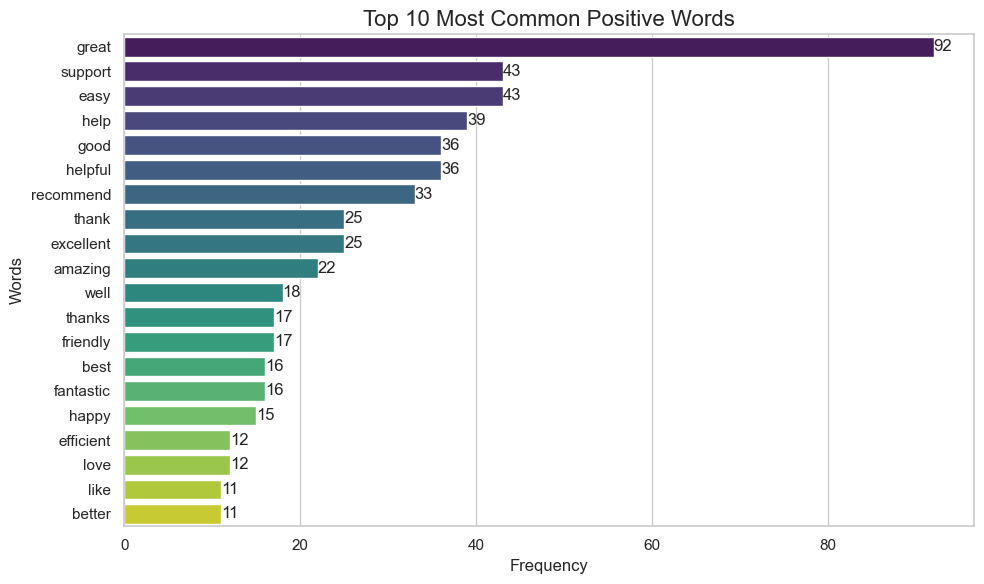

In [135]:
#Positive Word Chart

sns.set(style='whitegrid')
positive_word, positive_words_frequencies = zip(*most_common_positive_words)
plt.figure(figsize=(10,6))
ax=sns.barplot(x=positive_words_frequencies,y=positive_word, palette='viridis', orient='h')

for i,value in enumerate(positive_words_frequencies):
    ax.text(value,i,f"{value}", va='center',ha='left', fontsize=12)

plt.title('Top 10 Most Common Positive Words', fontsize=16)
plt.xlabel('Frequency',fontsize=12)
plt.ylabel('Words',fontsize=12)
plt.tight_layout()
plt.show()


/var/folders/6k/9lcwl8q960scjdl32lqz8h_80000gn/T/ipykernel_5308/2290927633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=negative_words_frequencies,y=negative_word,palette='rocket',orient='h')


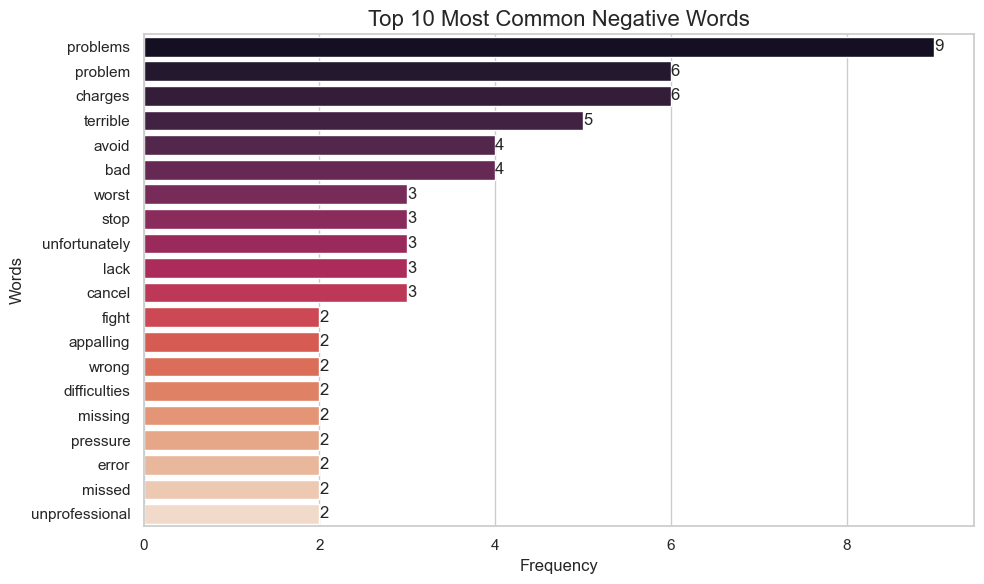

In [136]:
#Negative Words Chart
negative_word, negative_words_frequencies = zip(*most_common_negative_words)

sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
ax = sns.barplot(x=negative_words_frequencies,y=negative_word,palette='rocket',orient='h')

for i, value in enumerate(negative_words_frequencies):
    ax.text(value,i, f"{value}",va='center',ha='left',fontsize=12)

plt.title('Top 10 Most Common Negative Words', fontsize=16)
plt.xlabel('Frequency', fontsize = 12)
plt.ylabel('Words',fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/6k/9lcwl8q960scjdl32lqz8h_80000gn/T/ipykernel_5308/3729564602.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index,palette='viridis',orient='h')


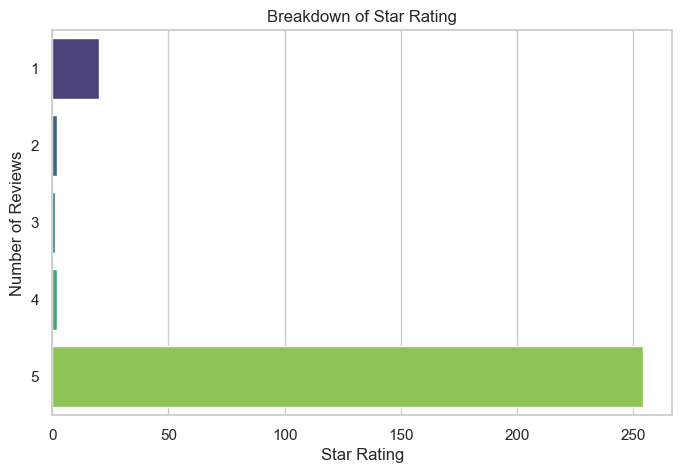

In [137]:
#average_rating
average_rating = df['ratingValue'].mean()
rating_counts = df['ratingValue'].value_counts().sort_index()
sns.set(style='whitegrid')
plt.figure(figsize=(8,5))
sns.barplot(x=rating_counts.values, y=rating_counts.index,palette='viridis',orient='h')
plt.title('Breakdown of Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()


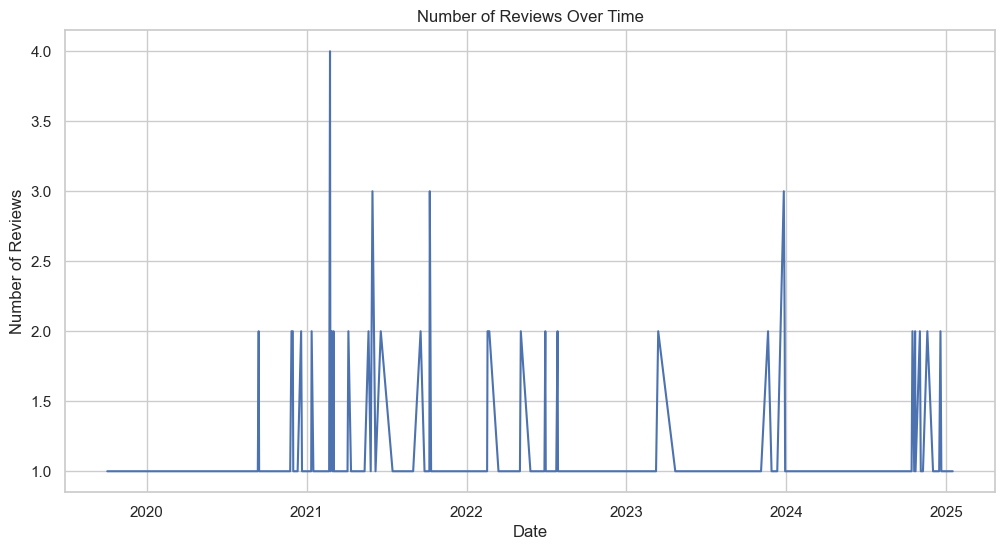

In [138]:
df['Dates'] = pd.to_datetime(df['Dates'])
review_per_day = df.groupby(df['Dates'].dt.date).size()
plt.figure(figsize=(12, 6))
review_per_day.plot(kind="line", title="Number of Reviews Over Time", xlabel="Date", ylabel="Number of Reviews")
plt.grid(True)
plt.show()

In [171]:
df['Dates'] = pd.to_datetime(df['Dates'])
review_per_day = df.groupby(df['Dates'].dt.date).size()
review_per_day

Dates
2019-10-03    1
2020-03-28    1
2020-06-12    1
2020-06-23    1
2020-07-09    1
             ..
2024-12-19    2
2024-12-21    1
2024-12-26    1
2024-12-27    1
2025-01-16    1
Length: 245, dtype: int64

In [139]:
review_per_day_zscore = zscore(review_per_day)
spikes = review_per_day[review_per_day_zscore>3]


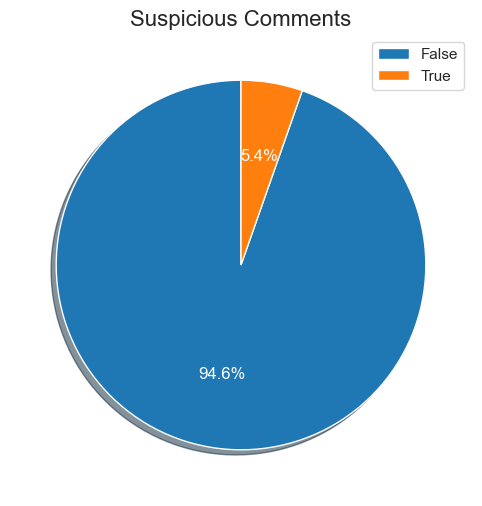

In [169]:
#Analyze text
review_per_day_zscore = zscore(review_per_day)
spikes = review_per_day[review_per_day_zscore>3]
vectorizer = TfidfVectorizer(stop_words='english')
tfid_matrix = vectorizer.fit_transform(df['reviewBody'])
cosine_sim = cosine_similarity(tfid_matrix,tfid_matrix)

import numpy as np
duplicate_pairs = np.argwhere(cosine_sim >0.9)
duplicate_pairs = duplicate_pairs[duplicate_pairs[:,0] != duplicate_pairs[:,1]]
df['is_suspicious'] = False

df.loc[df['Dates'].dt.date.isin(spikes.index),'is_suspicious']=True
df.loc[np.unique(duplicate_pairs.flatten()),'is_suspicious']=True
suspicious_counts = df['is_suspicious'].value_counts().reset_index()
plt.figure(figsize=(10,6))
plt.pie(suspicious_counts['count'],labels=suspicious_counts['is_suspicious'], autopct='%1.1f%%',startangle=90, colors=sns.color_palette('tab10'), shadow=True, textprops={'color':'w'})
plt.legend(suspicious_counts['is_suspicious'])
plt.title('Suspicious Comments',fontsize=16)
plt.show()



In [164]:
df['reviewBody'][0]

'Keep Away. Terrible company to deal with. No different than other cowboys. They are so good to you and on the case up until to the minute they sell you the product. Kiosk, epos, online ordering you name it. Once signed up support is nearly ZERO and out of UK as expectedYou will have to fight your way to get things done. All those promises about what they ll do for you is a big LIE.Whats worst is that when you realise they are rubbish and you want to leave They ll just stop communicating with you and leave you in the dark.If you are in touch with them and your sales person is Alex be wary and stop dealing with flipdish to save you the hassle. Grubber, EposNow, Kayana, Grubhub, Food hub and Flipdish are all the same with their selling techniques but offering no reliable product. Try finding a more decent one if you canUPDATE : I have waited 10 days after their reply to come here and inform everyone that This company is not only a nightmare to deal with but They are also big liars. As of